![title](creditcard.webp)

## 📚 Importing Libraries 📚

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
warnings.filterwarnings('ignore')

## ⏳ Exploring Dataset ⏳

In [63]:
df = pd.read_csv(r'creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 🧠 Understanding Data 🧠

In [6]:
df.shape

(284807, 31)

In [70]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

1. Time: Number of seconds elapsed between this transaction and the first transaction in the dataset.

    
2. V1 - V28: Result of a PCA Dimensionality reduction to protect user identities and sensitive features.
    

3. Amount: Transaction amount
    

4. Class: Fraud or not (1 = Fraud, 0 = Not Fraud)

In [61]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## 🧹 Data Cleaning 🧹

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [64]:
df.duplicated().sum()

1081

There are 1081 duplicate rows in our dataset. So, we need to remove them.

In [65]:
df = df.drop_duplicates()

In [66]:
df.reset_index(inplace = True)

In [67]:
df.duplicated().sum()

0

In [68]:
df.drop('index', axis = 1, inplace = True)

In [15]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [69]:
df.shape

(283726, 31)

#  📊 Data Visualization 📊

##  Univariate Analysis

### ** Class ** 

In [76]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

 Data is highly imabalanced.
 We will perform downsampling to rectify this problem.

([<matplotlib.axis.XTick at 0x1ca6f4ebbd0>,
 [Text(0, 0, 'Legitimate'), Text(1, 0, 'Fraud')])

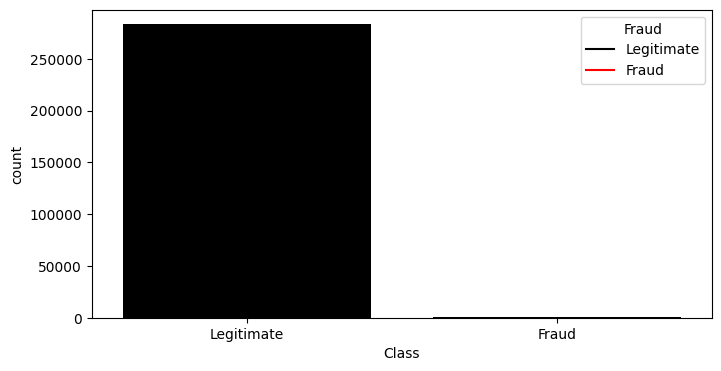

In [191]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'Class', data = df, color = 'black')
legends = [plt.Line2D([0], [0], color = 'black'), plt.Line2D([0], [0], color = 'red')]
plt.legend(legends, ['Legitimate', 'Fraud'], title = 'Fraud')
plt.xticks([0,1], ['Legitimate', 'Fraud'])

### ** Amount **

In [78]:
df['Amount'].max()

25691.16

The majority of transactions are less than 5,000.
In our dataset, the maximum "amount" is 25691.16.
    

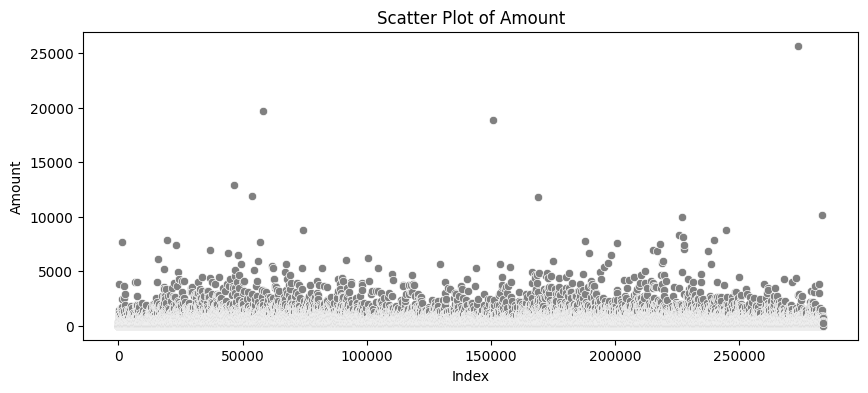

In [193]:
plt.figure(figsize = (10,4))
sns.scatterplot(x=df.index, y=df['Amount'], color='grey')
plt.xlabel('Index')  
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount')
plt.show()

## Bivariate Analysis

### visulize Amount with Time

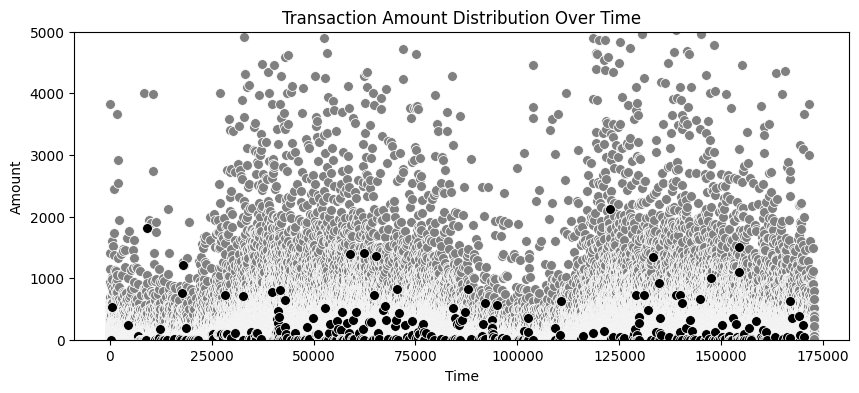

In [192]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(data = df[df['Class'] == 0], x = 'Time', y = 'Amount', color = 'grey', s = 50)
plt.ylim(0, 5000)
sns.scatterplot(data = df[df['Class'] == 1], x='Time', y = 'Amount', color = 'black', s = 50)
ax.set_title("Transaction Amount Distribution Over Time")
plt.show()

### visulize Time and Class

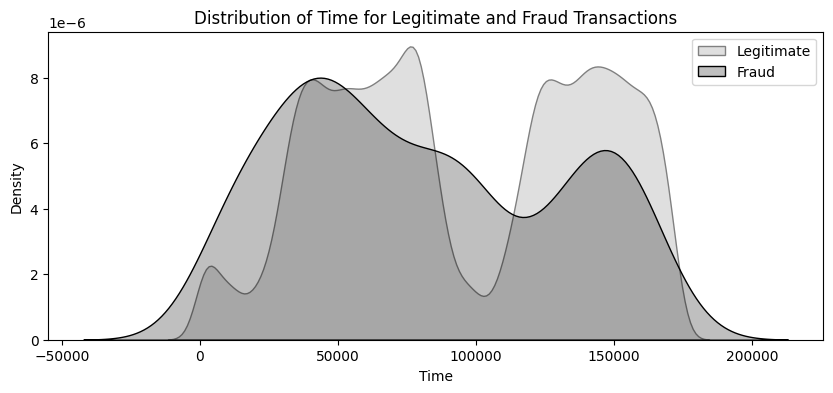

In [185]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Legitimate', fill=True, color='grey') 
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', fill=True, color='black')  
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Distribution of Time for Legitimate and Fraud Transactions')
plt.legend()
plt.show()

### visulize Amouth and Class

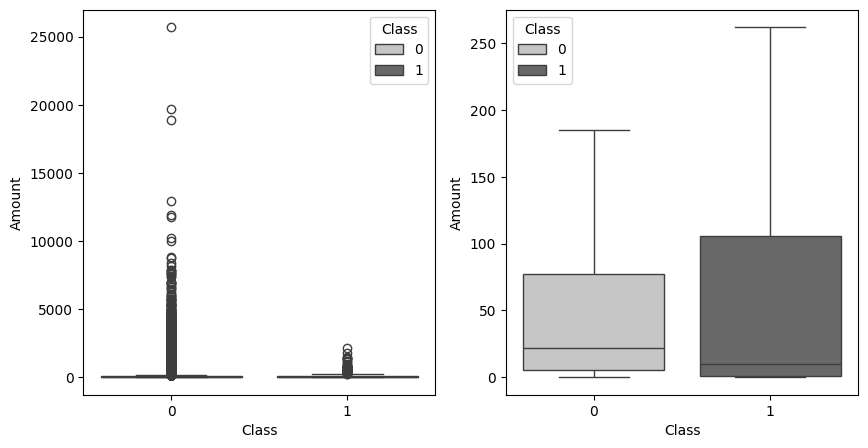

In [172]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="Greys",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="Greys",showfliers=False)
plt.show();

## ⚙️ Data Preprocessing ⚙️

In Data Preprocessing, we will perorm:
    
    1. Check for outliers
    2. Check correlation
    3. Split data in train and test
    4. Apply standard scaling
    5. Perform downsampling

In [81]:
df1 = df.copy(deep = True)

In [82]:
def outliers_box(d_f,col_):
    q1 = np.quantile(d_f[col_],.25)
    q2 = np.quantile(d_f[col_],.75)
    iqr = q2-q1
    maxima_ = q2 + 1.5*iqr
    minima_ = q1 - 1.5*iqr
    
    if((d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_)):
        print(col_,'------- outliers present')
    else:
        print(col_,'------- outliers not present')
        
    return(minima_,maxima_)

In [83]:
def out_remove(d_f,col_):
    x1,y1 = outliers_box(d_f,col_)
    df1.drop(index= d_f[(d_f[col_]<x1) | (d_f[col_]>y1)].index, axis = 0, inplace =True)

In [84]:
for i in df1.columns:
    out_remove(df1,i)
    df1.reset_index(drop=True,inplace = True)

Time ------- outliers not present
V1 ------- outliers present
V2 ------- outliers present
V3 ------- outliers present
V4 ------- outliers present
V5 ------- outliers present
V6 ------- outliers present
V7 ------- outliers present
V8 ------- outliers present
V9 ------- outliers present
V10 ------- outliers present
V11 ------- outliers present
V12 ------- outliers present
V13 ------- outliers present
V14 ------- outliers present
V15 ------- outliers present
V16 ------- outliers present
V17 ------- outliers present
V18 ------- outliers present
V19 ------- outliers present
V20 ------- outliers present
V21 ------- outliers present
V22 ------- outliers present
V23 ------- outliers present
V24 ------- outliers present
V25 ------- outliers present
V26 ------- outliers present
V27 ------- outliers present
V28 ------- outliers present
Amount ------- outliers present
Class ------- outliers present


In [86]:
df.shape

(283726, 31)

In [85]:
df1.shape

(109819, 31)

Upon eliminating the anomalies, 60% of the data was eliminated.Therefore, we won't eliminate the outliers in this instance. 

In [87]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


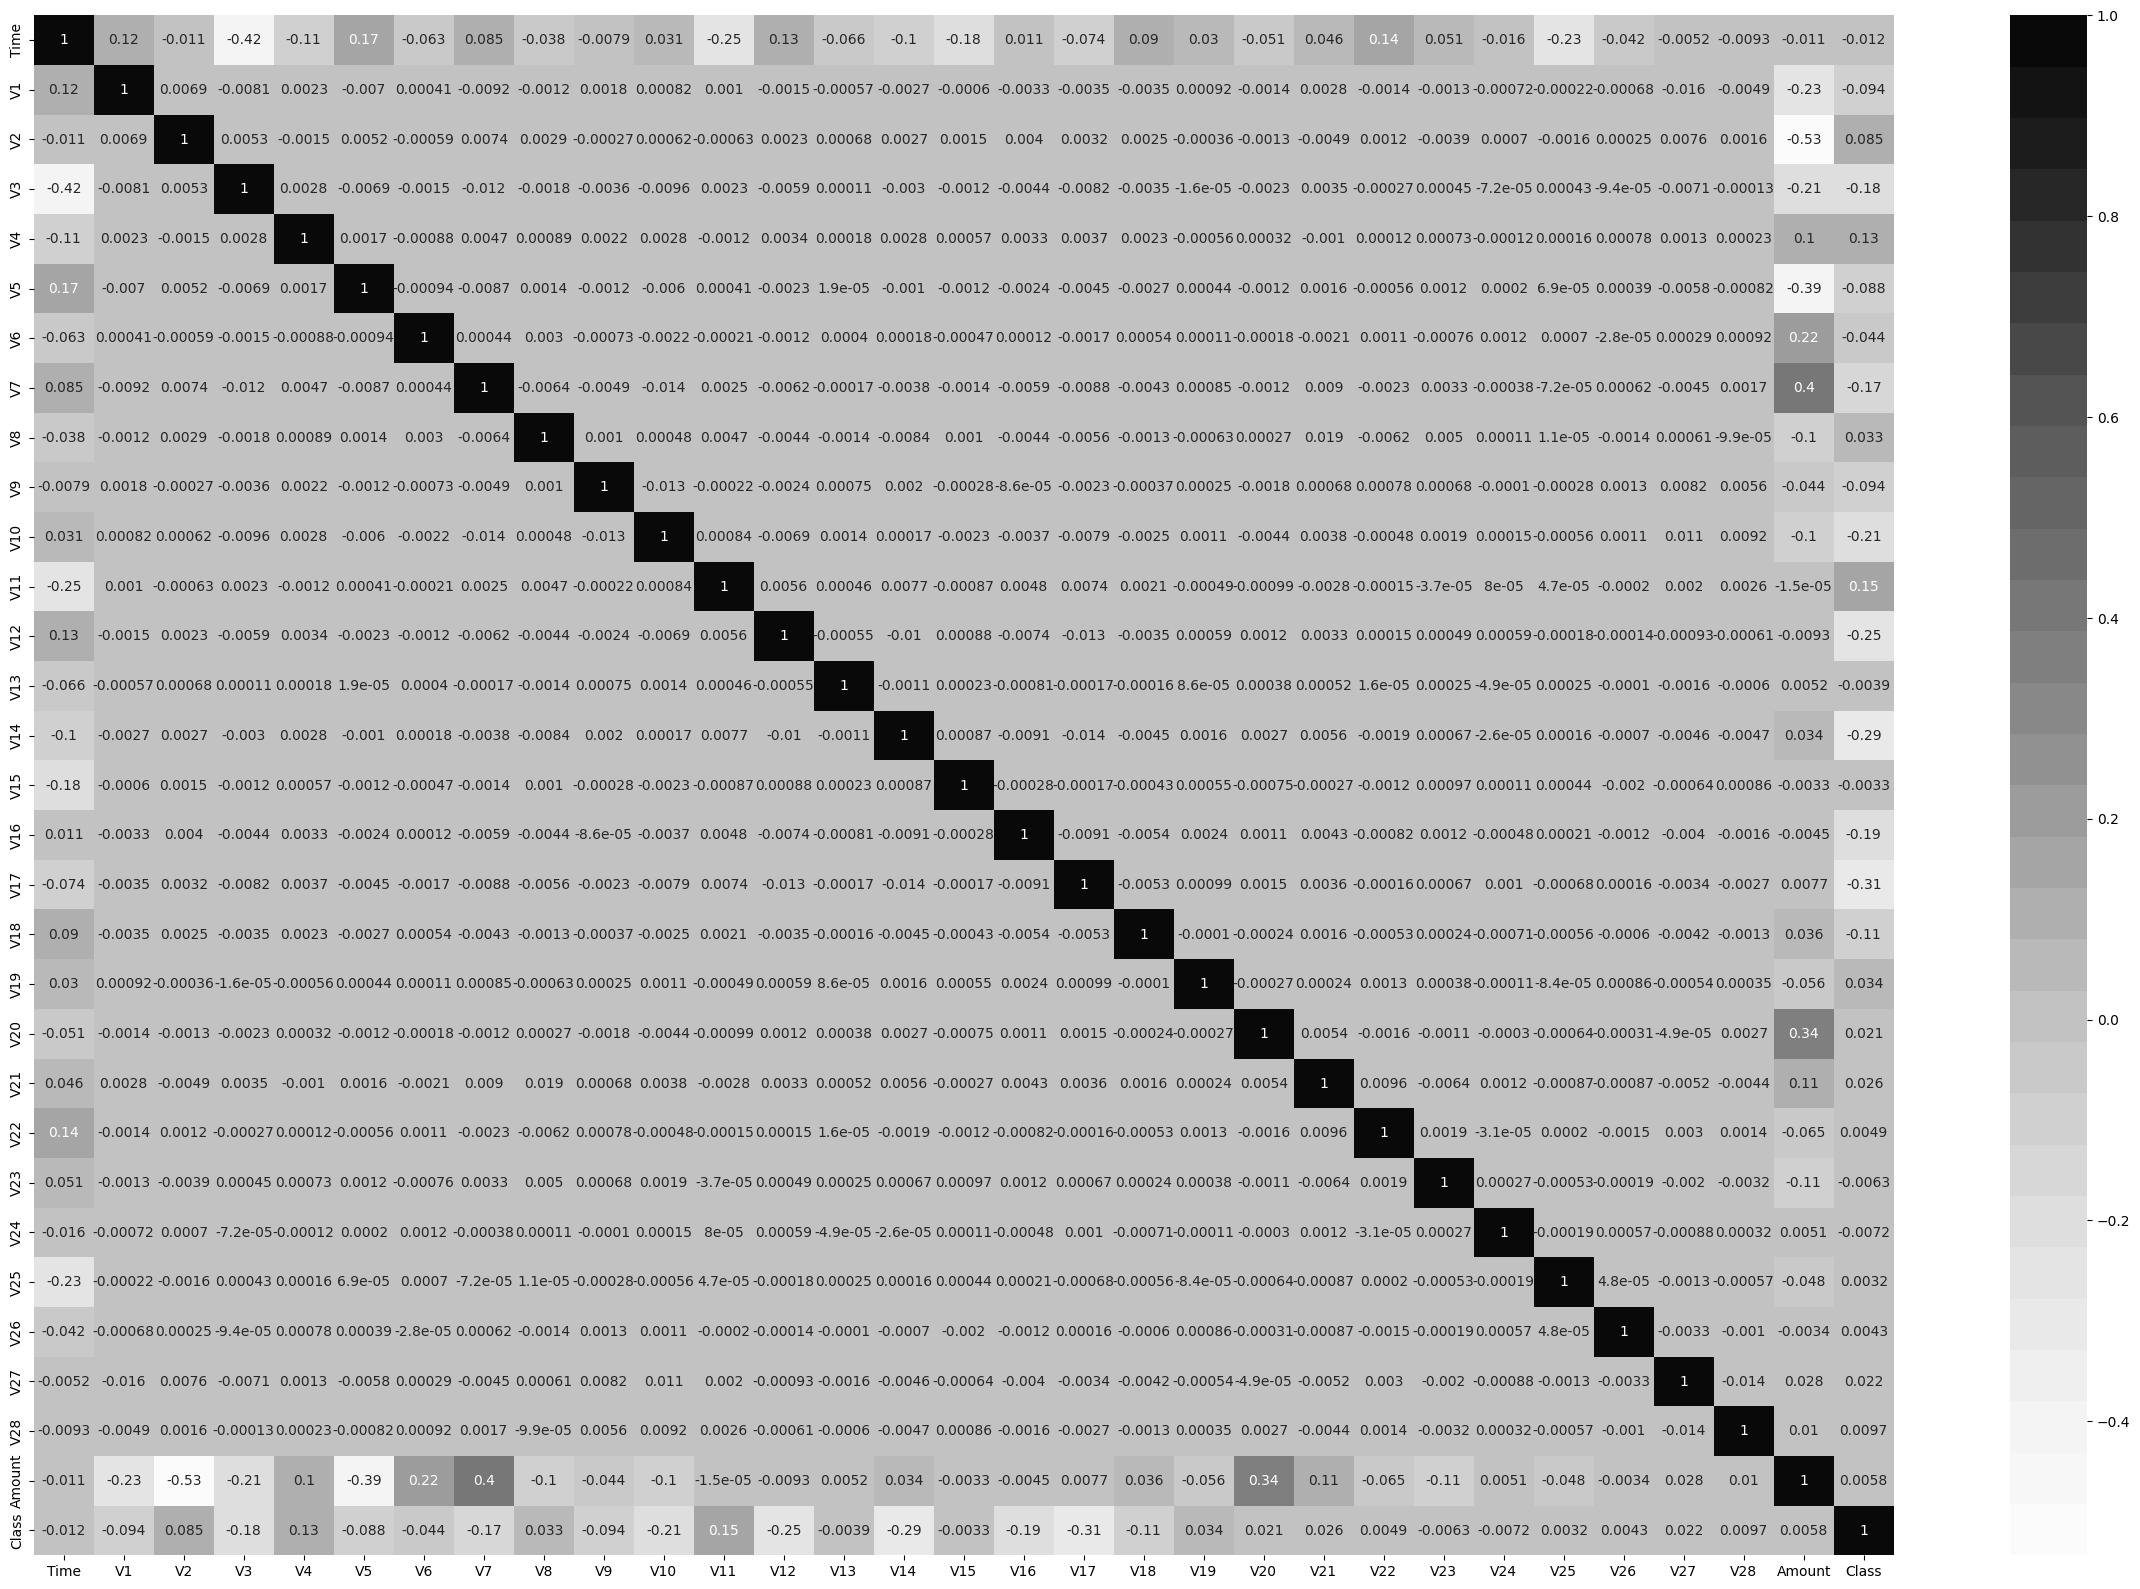

In [96]:
gray_palette = sns.color_palette('Greys', n_colors=30)
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True, cmap=gray_palette)
plt.show()

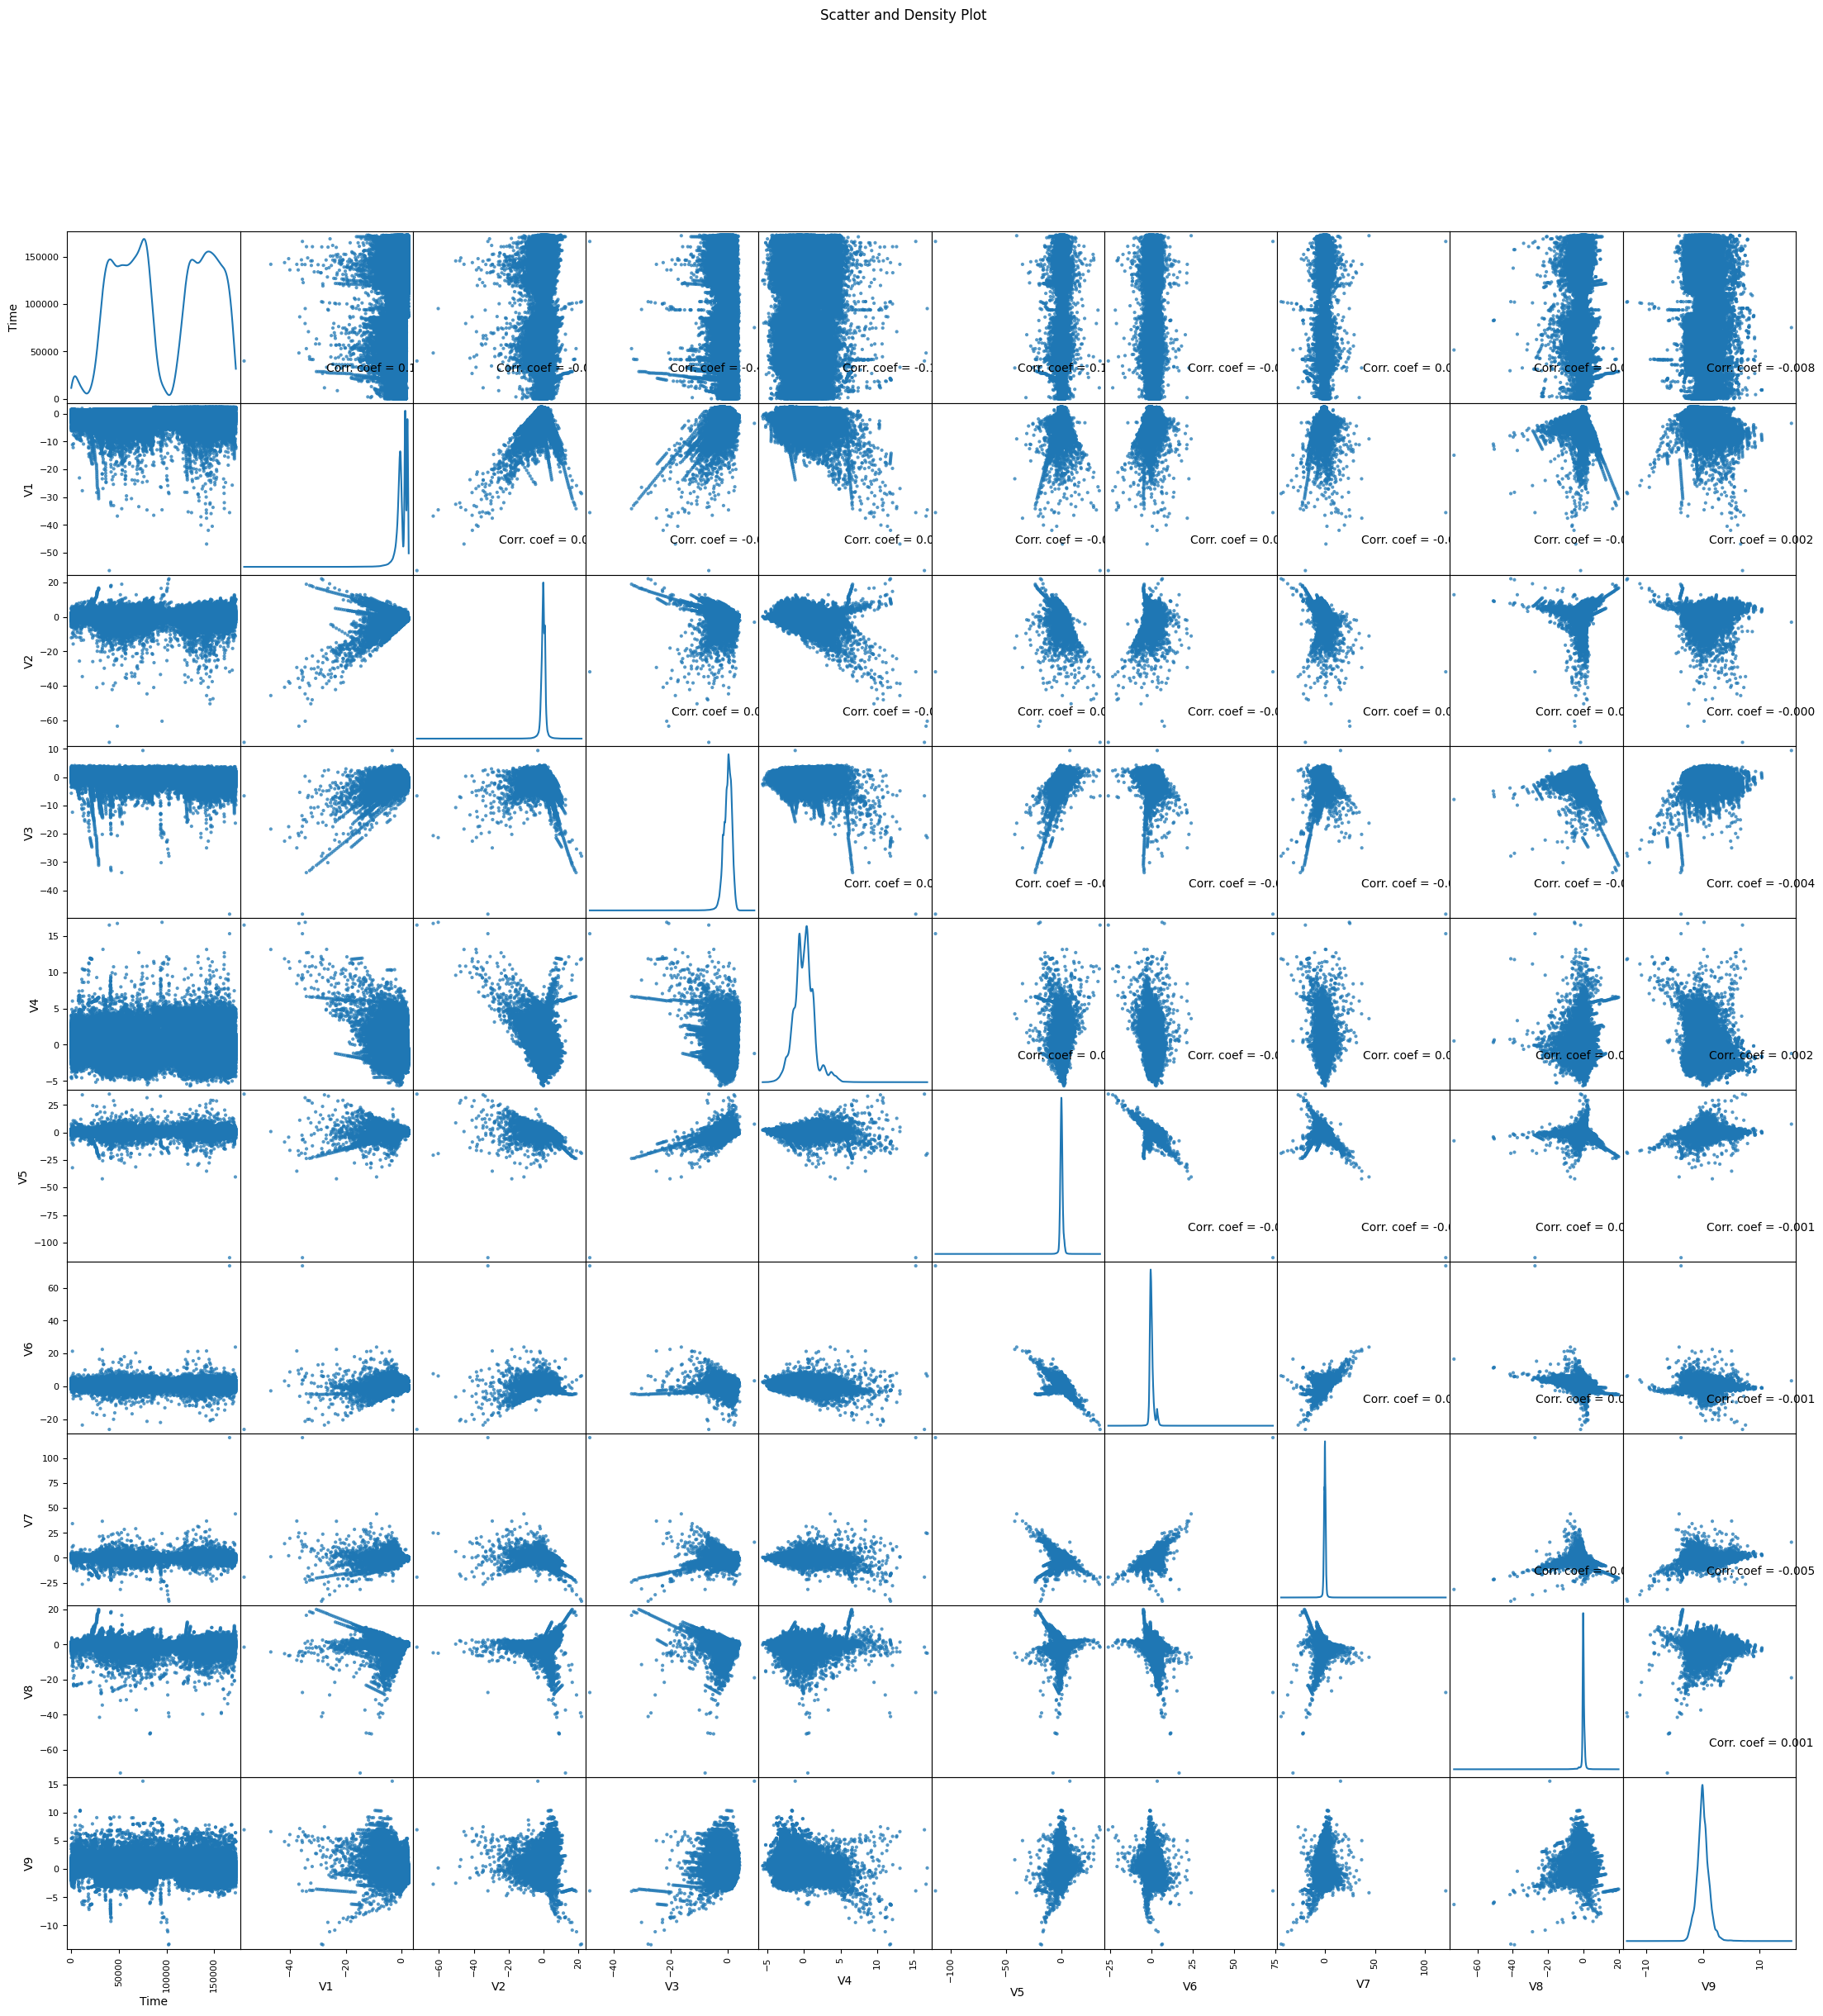

In [180]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')  # Specify the axis parameter here
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df, 27, 10)

# Downsampling

In [98]:
downsample = resample(df[df['Class'] == 0], replace = True, n_samples = 473, random_state = 20)

In [99]:
new_df = pd.concat([downsample, df[df['Class'] == 1]])

In [100]:
new_df.reset_index(inplace = True)

In [101]:
new_df.drop('index', axis = 1, inplace = True)

In [102]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

Now, we have the balanced data.

([<matplotlib.axis.XTick at 0x1cb8d432d10>,
 [Text(0, 0, 'Legitimate'), Text(1, 0, 'Fraud')])

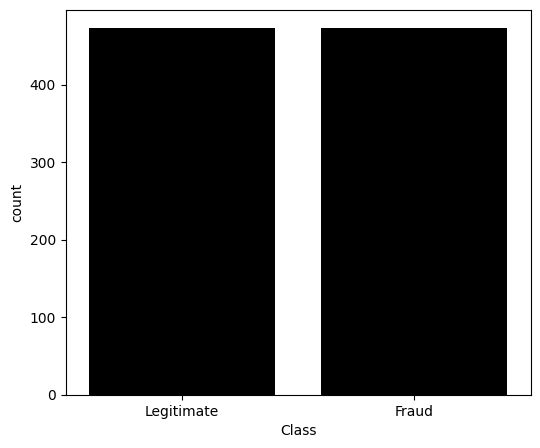

In [181]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'Class', data = new_df,color='black')
plt.xticks([0,1], ['Legitimate', 'Fraud'])

#### Standard Scaling

In [104]:
scale = new_df.drop('Class', axis = 1)

In [105]:
ss = StandardScaler()

In [106]:
scaled_data = ss.fit_transform(scale)

In [107]:
scaled_df = pd.DataFrame(scaled_data, columns = scale.columns)

In [108]:
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.981663,-0.217325,-1.240853,0.870124,-0.631197,1.181493,-0.993200,0.235364,-0.086336,0.470293,...,-0.001870,-0.165573,-0.837706,0.186327,0.425170,0.181720,-0.067438,-0.609649,0.767960,-0.419379
1,1.126252,0.290369,-0.358020,0.430771,-1.509223,0.482860,-0.291438,0.634432,-0.103585,-0.429442,...,-0.224585,0.162405,1.162590,-0.308166,-0.493440,0.750242,-0.074560,-0.217160,-0.052829,-0.215949
2,-1.027648,0.603634,-0.519570,0.544212,-0.285190,0.304228,0.203055,0.524056,-0.139162,0.648842,...,-0.236792,-0.080441,-0.011599,-0.148569,0.267316,0.988555,-0.540644,-0.111855,-0.011383,0.071456
3,0.752873,-0.191522,-0.548372,0.418030,-0.941296,0.752774,0.196026,0.645277,-0.211441,0.926040,...,-1.393405,-0.416108,-0.263420,0.452717,0.357730,0.495948,-0.401853,-1.178854,0.301973,-0.279336
4,-0.196309,0.653489,-0.260240,0.488487,-0.309560,0.387603,-0.302680,0.532667,-0.194643,0.467971,...,-0.251695,-0.135355,-0.098919,-0.083211,0.615569,1.033127,-0.734273,-0.063893,0.064370,-0.419337


## ✍🏻 PREPARE THE DATA FOR ALGORITHMES ✍🏻

In [109]:
X = scaled_df
y = new_df['Class']

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

## Logistic Regression 📝

In [112]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

#### Prediction dans Train

In [117]:
y_pred_lr__train=clf.predict(X_train)
print(classification_report(y_train,y_pred_lr__train))
score=accuracy_score(y_train,y_pred_lr__train)
print(f'Accuracy: {round(score*100,2)}%')

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       333
           1       0.97      0.91      0.94       329

    accuracy                           0.94       662
   macro avg       0.95      0.94      0.94       662
weighted avg       0.95      0.94      0.94       662

Accuracy: 94.41%


#### Prediction dans Test

In [118]:
y_pred_lr=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[135   5]
 [ 12 132]]


In [119]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       140
           1       0.96      0.92      0.94       144

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



In [120]:
score=accuracy_score(y_test,y_pred_lr)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.01%


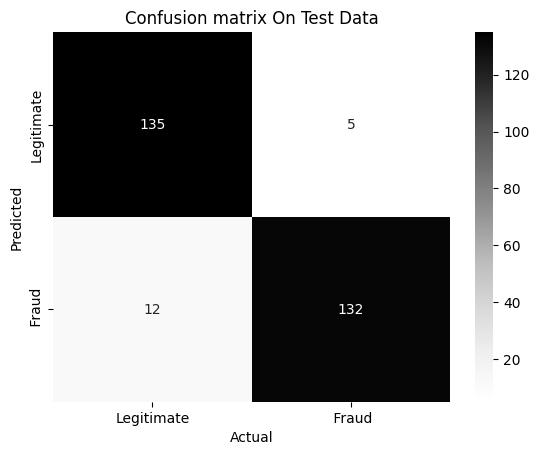

In [121]:
new_cm = pd.DataFrame(cm , index = ['Legitimate',' Fraud'] , columns = ['Legitimate',' Fraud'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Legitimate',' Fraud'], yticklabels = ['Legitimate',' Fraud'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## Decision tree 📝

In [122]:
modele_arbre_decision = DecisionTreeClassifier(random_state=42)
modele_arbre_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [123]:
y_pred_dt = modele_arbre_decision.predict(X_test)
ypred_dt_train = modele_arbre_decision.predict(X_train)

In [125]:
cm_nb = confusion_matrix(y_test, y_pred_dt)
print(cm_nb)

[[126  14]
 [ 15 129]]


In [126]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       140
           1       0.90      0.90      0.90       144

    accuracy                           0.90       284
   macro avg       0.90      0.90      0.90       284
weighted avg       0.90      0.90      0.90       284



In [127]:
score_rf=accuracy_score(y_test,y_pred_dt)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 89.79%


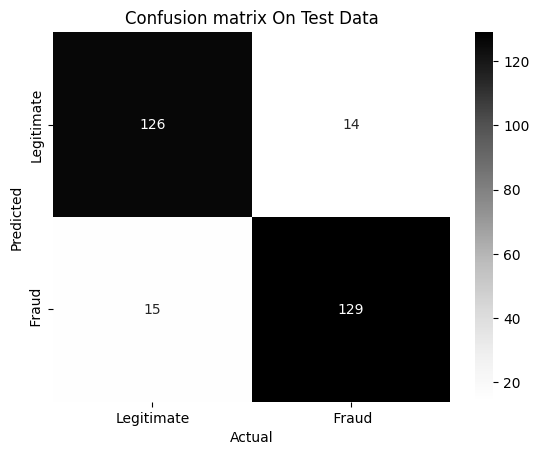

In [128]:
new_cm = pd.DataFrame(cm_nb , index = ['Legitimate',' Fraud'] , columns = ['Legitimate',' Fraud'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Legitimate',' Fraud'], yticklabels = ['Legitimate',' Fraud'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## KNN 📝

In [132]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [133]:
y_pred_knn = knn.predict(X_test)
ypred_knn_train = knn.predict(X_train)

In [134]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[135   5]
 [ 18 126]]


In [135]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       140
           1       0.96      0.88      0.92       144

    accuracy                           0.92       284
   macro avg       0.92      0.92      0.92       284
weighted avg       0.92      0.92      0.92       284



In [136]:
score_rf=accuracy_score(y_test,y_pred_knn)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 91.9%


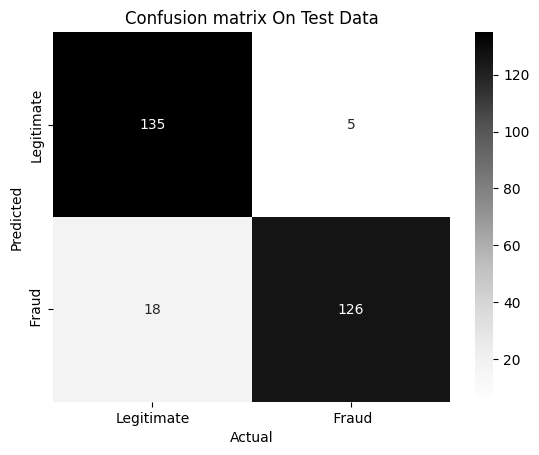

In [137]:
new_cm = pd.DataFrame(cm_knn , index = ['Legitimate',' Fraud'] , columns = ['Legitimate',' Fraud'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Legitimate',' Fraud'], yticklabels = ['Legitimate',' Fraud'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## Random Forest 📝

In [139]:
rndm = RandomForestClassifier()
rndm.fit(X_train,y_train)

RandomForestClassifier()

In [140]:
y_pred_rndm = rndm.predict(X_test)
ypred_rndm_train = rndm.predict(X_train)

In [141]:
cm_rndm = confusion_matrix(y_test, y_pred_rndm)
print(cm_rndm)

[[136   4]
 [ 11 133]]


In [142]:
print(classification_report(y_test,y_pred_rndm))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       140
           1       0.97      0.92      0.95       144

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284



In [143]:
score_rf=accuracy_score(y_test,y_pred_rndm)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 94.72%


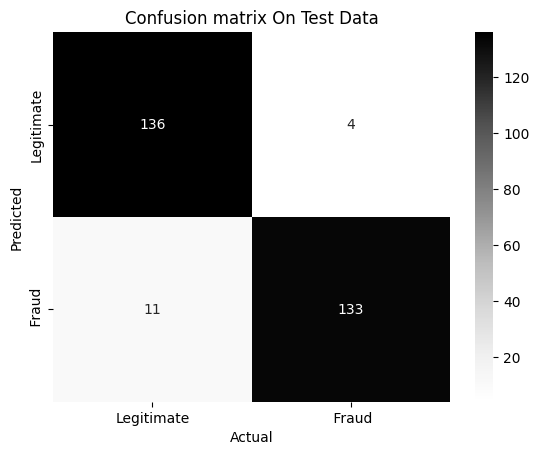

In [144]:
new_cm = pd.DataFrame(cm_rndm , index = ['Legitimate',' Fraud'] , columns = ['Legitimate',' Fraud'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Legitimate',' Fraud'], yticklabels = ['Legitimate',' Fraud'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

##  SVM 📝

In [146]:
svm = SVC()
model_svm = svm.fit(X_train, y_train)
model_svm

SVC()

In [147]:
y_pred_svm = model_svm.predict(X_test)
ypred_svm_train = model_svm.predict(X_train)

In [148]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[136   4]
 [ 16 128]]


In [149]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       140
           1       0.97      0.89      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



In [150]:
score_rf=accuracy_score(y_test,y_pred_svm)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 92.96%


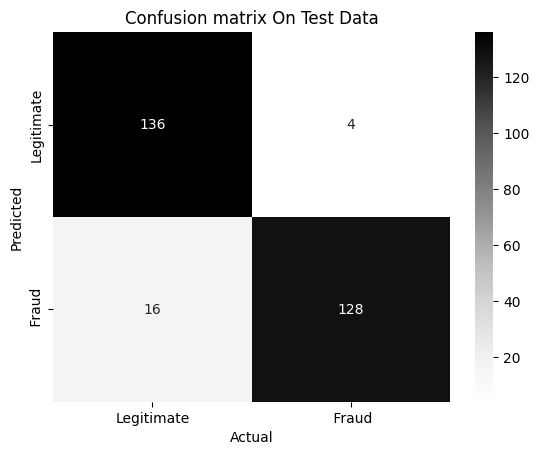

In [151]:
new_cm = pd.DataFrame(cm_svm , index = ['Legitimate',' Fraud'] , columns = ['Legitimate',' Fraud'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Legitimate',' Fraud'], yticklabels = ['Legitimate',' Fraud'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## XGBoost Classifier 📝

In [152]:
import xgboost as xgb

In [153]:
xg=xgb.XGBClassifier(n_estimators=20,random_state=42)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [154]:
y_pred_xg = xg.predict(X_test)
ypred_xg_train = xg.predict(X_train)

In [155]:
cm_xg = confusion_matrix(y_test, y_pred_xg)
print(cm_xg)

[[135   5]
 [ 11 133]]


In [156]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       140
           1       0.96      0.92      0.94       144

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



In [157]:
score_rf=accuracy_score(y_test,y_pred_xg)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 94.37%


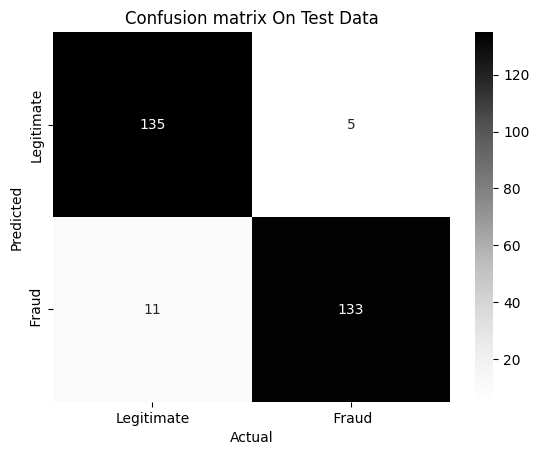

In [158]:
new_cm = pd.DataFrame(cm_xg , index = ['Legitimate',' Fraud'] , columns = ['Legitimate',' Fraud'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Legitimate',' Fraud'], yticklabels = ['Legitimate',' Fraud'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

### Score card 

In [159]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Accuracy_Score_train', 'Precision_Score_train', 'Recall_Score_train', 'F1_Score_train', 'Accuracy_Score_test', 'Precision_Score_test', 'Recall_Score_test', 'F1_Score_test'])

In [160]:
def score_card(d_f, model_name, y_pred, y_test, x_pred, y_train):
    metrics_dict = {
        'Model_name': model_name,
        'Accuracy_Score_train': accuracy_score(y_train, x_pred),
        'Precision_Score_train': precision_score(y_train, x_pred, average='macro'),
        'Recall_Score_train': recall_score(y_train, x_pred, average='macro'),
        'F1_Score_train': f1_score(y_train, x_pred, average='macro'),
        'Accuracy_Score_test': accuracy_score(y_test, y_pred),
        'Precision_Score_test': precision_score(y_test, y_pred, average='macro'),
        'Recall_Score_test': recall_score(y_test, y_pred, average='macro'),
        'F1_Score_test': f1_score(y_test, y_pred, average='macro')
    }

    dfx = pd.concat([d_f, pd.DataFrame(metrics_dict, index=[0])], ignore_index=True)
    return dfx

In [161]:
df101 = score_card(df_scorecard, 'Logistic Regression ', y_pred_lr, y_test, y_pred_lr__train, y_train)
df102 = score_card(df101, 'Decision Tree ', y_pred_dt, y_test, ypred_dt_train, y_train)
df103 = score_card(df102, 'KNN ', y_pred_knn, y_test, ypred_knn_train, y_train)
df104 = score_card(df103, 'Random Forest' , y_pred_rndm , y_test , ypred_rndm_train , y_train)
df105 = score_card(df104, 'SVM ', y_pred_svm, y_test, ypred_svm_train, y_train)
df106 = score_card(df105, 'XGBoost ', y_pred_xg, y_test, ypred_xg_train, y_train)

df106

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.944109,0.946053,0.943915,0.944029,0.940141,0.940935,0.940476,0.940134
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,0.897887,0.897857,0.897917,0.897876
2,KNN,0.932024,0.935562,0.931757,0.931855,0.919014,0.922093,0.919643,0.918933
3,Random Forest,1.000000,1.000000,1.000000,1.000000,0.947183,0.947986,0.947520,0.947177
4,SVM,0.947130,0.949877,0.946900,0.947028,0.929577,0.932217,0.930159,0.929522
5,XGBoost,0.998489,0.998503,0.998480,0.998489,0.943662,0.944213,0.943948,0.943659


### Testing My Best Model on new sentences never seen before 🧪🔎

In [162]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [163]:
# Give input as an array
array = np.array([4462, -2.303349568, 1.75924746, -0.359744743, 2.330243051, -0.821628328, -0.075787571, 0.562319782, 
                  -0.399146578, -0.238253368, -1.525411627, 2.032912158, -6.560124295, 0.022937323, -1.470101536, -0.698826069,
                  -2.282193829, -4.781830856, -2.615664945, -1.334441067, -0.430021867, -0.294166318, -0.932391057, 0.172726296,
                  -0.087329538, -0.156114265, -0.542627889, 0.039565989, -0.153028797, 239.93

])

scaled = ss.transform(array.reshape(1,-1))
sc_df = pd.DataFrame(scaled.reshape(1,30), columns = scale.columns)
sc_df
ypred = model_gscv_rf.predict(sc_df)
if ypred == 0:
    print('Prediction is: {}'.format(ypred))
    print('Customer is legitimate')
else:
    print('Prediction is: {}'.format(ypred))
    print('Customer is fraud')

Prediction is: [1]
Customer is fraud


![title](end1.jpg)